In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
def make_nonlinear(n_samples=30, seed=0):
    np.random.seed(seed)
    X = np.sort(np.random.rand(n_samples)) # 0부터 1까지 30개
    y = np.sin(2*np.pi * X) + np.random.randn(n_samples)*0.1
    return (X, y)    

In [3]:
X, y = make_nonlinear()

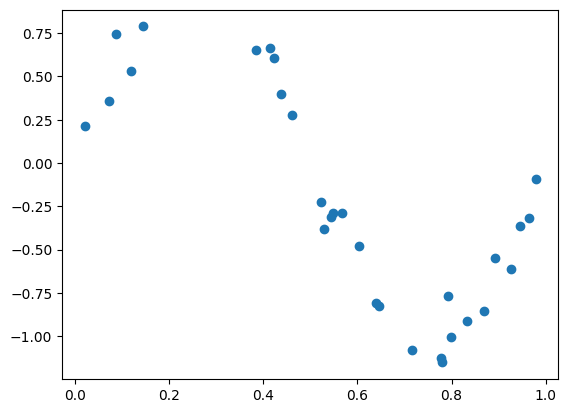

In [4]:
plt.scatter(X, y)
plt.show()

In [5]:
import pandas as pd
df = pd.DataFrame(data=np.c_[X, y], columns=['x', 'y'])
df.head()

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


# statsmodels의 정규화 선형회귀 모형

In [6]:
import statsmodels.api as sm
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()
result.params

Intercept    0.713959
x           -1.642204
dtype: float64

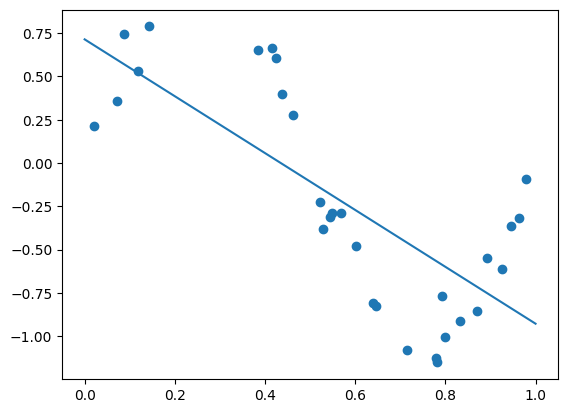

In [7]:
plt.scatter(X, y)
xx = np.linspace(0, 1, 1000) # 0부터 1까지 1000개
x_df = pd.DataFrame(data=np.c_[xx, [1]*1000], columns=['x', 'a'])
plt.plot(xx, result.predict(x_df))
plt.show()

In [8]:
formula = "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)"
# formula = "y ~ x + I(x**2) + I(x**3)"

In [9]:
model2 = sm.OLS.from_formula(formula, data=df)
result2 = model2.fit()
result2.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723114
I(x ** 4)   -18340.939663
I(x ** 5)    49326.072543
I(x ** 6)   -78884.743070
I(x ** 7)    74538.645149
I(x ** 8)   -38453.132189
I(x ** 9)     8350.254985
dtype: float64

In [10]:
model9 = sm.OLS.from_formula(formula, data=df)

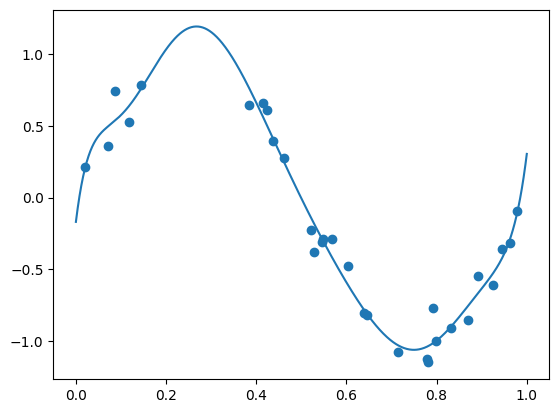

In [11]:
result9 = model9.fit()
plt.scatter(X, y)
plt.plot(xx, result9.predict(x_df))
plt.show()

In [12]:
model9 = sm.OLS.from_formula(formula, data=df)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


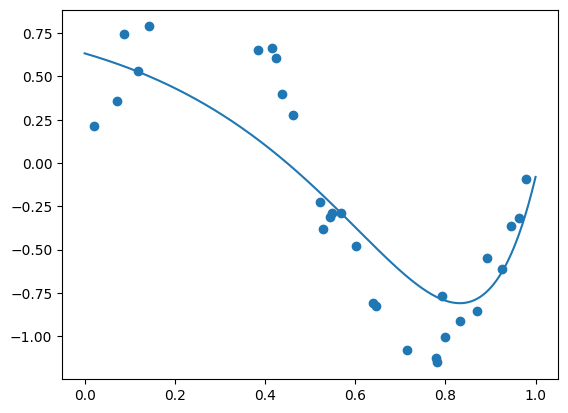

In [13]:
result9 = model9.fit_regularized(L1_wt=0, alpha=0.01)
print(result9.params)
plt.scatter(X, y)
plt.plot(xx, result9.predict(x_df))
plt.show()

In [14]:
result9.params

array([ 0.63308745, -0.75705866, -1.07056551, -0.76835135, -0.35530367,
        0.0121939 ,  0.29917825,  0.50969248,  0.65793698,  0.75851865])

In [15]:
model9_lasso = sm.OLS.from_formula(formula, data=df)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


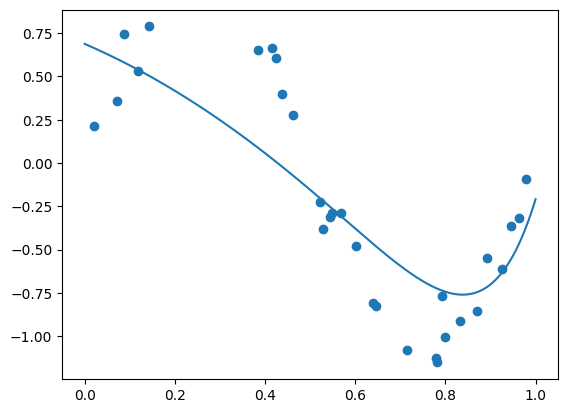

In [16]:
result9 = model9.fit_regularized(L1_wt=1, alpha=0.01)
# result9 = model9.fit_regularized(method="sqrt_lasso", alpha=0.01) # pip install ovxopt
print(result9.params)
plt.scatter(X, y)
plt.plot(xx, result9.predict(x_df))
plt.show()

In [17]:
model9 = sm.OLS.from_formula(formula, data=df)

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


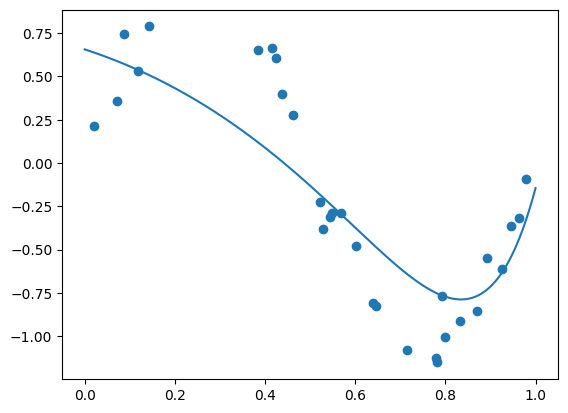

In [18]:
result9 = model9.fit_regularized(L1_wt=0.5, alpha=0.01)
print(result9.params)
plt.scatter(X, y)
plt.plot(xx, result9.predict(x_df))
plt.show()

# sklearn의 정규화 회귀모형

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [20]:
def make_nonlinear_data(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2*np.pi*X) + np.random.randn(n_samples)*0.1
    X = X[:, np.newaxis]
    return (X, y)

In [21]:
def plot_model(model):
    plt.scatter(X, y)
    x = np.linspace(0, 1, 1000)
    plt.plot(x, model.predict(x[:, np.newaxis]))
    plt.show()

In [22]:
X, y = make_nonlinear_data()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import  LinearRegression

In [24]:
deg = 9

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025498e+03]


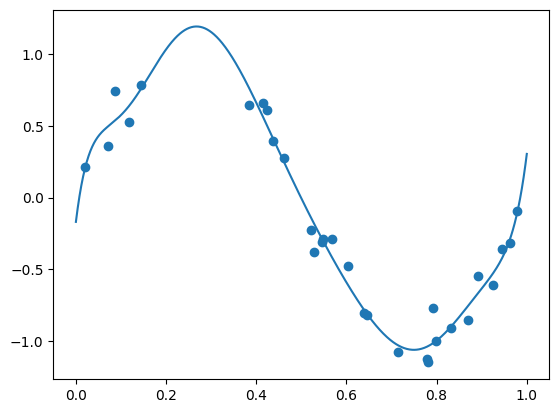

In [25]:
poly = PolynomialFeatures(deg)
model = make_pipeline(poly, LinearRegression()).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [26]:
model.steps[1][1].coef_

array([ 0.00000000e+00,  2.57357731e+01, -4.28141683e+02,  3.86672311e+03,
       -1.83409397e+04,  4.93260725e+04, -7.88847431e+04,  7.45386451e+04,
       -3.84531322e+04,  8.35025498e+03])

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


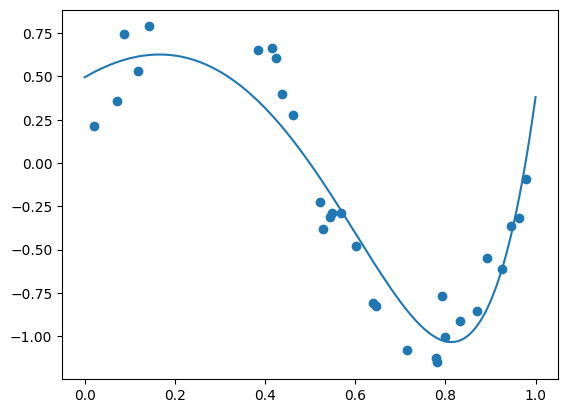

In [27]:
from sklearn.linear_model import Ridge
model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


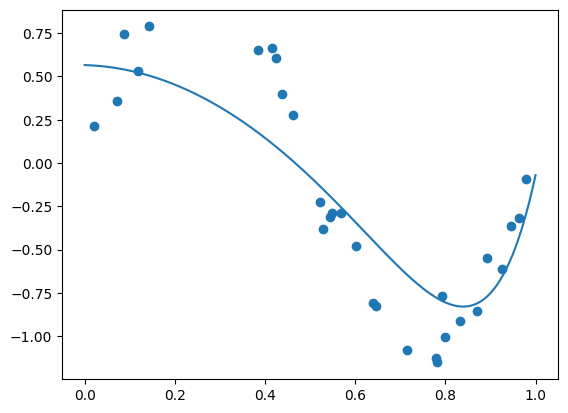

In [28]:
from sklearn.linear_model import Lasso
model = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


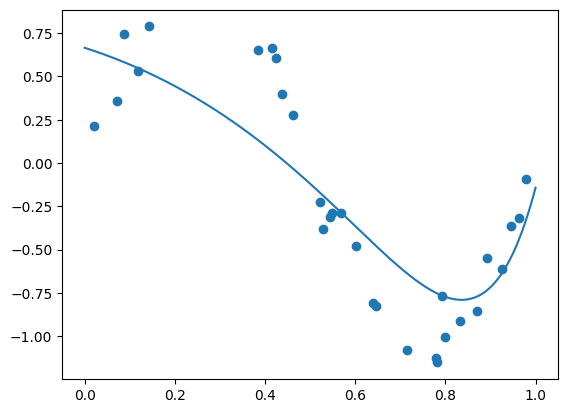

In [29]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
model = make_pipeline(poly, elastic).fit(X, y)
print(model.steps[1][1].coef_)
plot_model(model)

In [30]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.549162,-7.197534,1.308705,29.466112,19.812842
2,-239.086958,-234.549764,-207.192418,-83.154276,-0.918430
3,520.369375,520.588601,489.695171,306.352680,75.416214
4,323.822745,320.517131,301.764058,201.627734,55.025160
5,-712.322159,-380.607135,-83.466034,5.909614,19.924621
6,413.379125,150.484671,-70.826832,-29.515495,13.948715
7,65.811323,-78.589275,-188.678898,-152.040280,-47.553816
8,167.513007,130.312521,115.712136,117.311732,48.259433
9,720.939924,592.347959,443.812917,262.944290,70.143948


In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
alpha = np.logspace(-3, 1, 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.996177,-1.304662,-0.000000,0.000000,0.000000
2,-238.896328,-228.819129,-155.359976,-0.000000,0.000000
3,520.267403,525.566130,517.186795,367.703860,0.000000
4,323.423596,316.168834,275.077235,6.298858,0.000000
5,-720.244828,-307.016211,-52.539365,0.000000,0.000000
6,421.399753,89.324647,-0.000000,0.000000,0.000000
7,66.733503,-105.078369,-210.157991,-0.000000,-0.000000
8,164.448022,119.597616,0.000000,0.000000,0.000000
9,725.335558,571.330356,483.912648,307.605418,0.000000


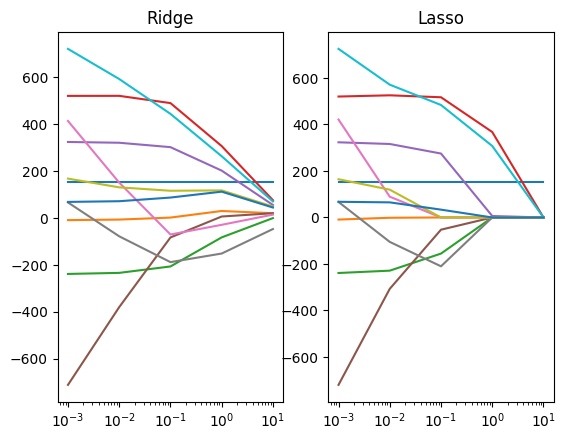

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, label=np.log10(alpha))
plt.title("Lasso")
plt.show()